# 3803ICT Big Data Assignment - Code

## PART 1 DATA PREPERATION AND PRE-PROCESSING

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re

In [2]:
#Get high level view of the data
baseDataFrame = pd.read_csv('data/data.csv', low_memory=False)
print("The Dataset consists of: ", baseDataFrame.shape[0], " rows and ", baseDataFrame.shape[1], " columuns")
baseDataFrame.head(10)

The Dataset consists of:  318477  rows and  13  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,37404301,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


In [3]:
#Get data types
baseDataFrame.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [4]:
#Fix the date data type since it is in wrong format
baseDataFrame["Date"] = baseDataFrame["Date"].replace(to_replace=r'T.*', value='', regex=True)
baseDataFrame["Date"] = pd.to_datetime(baseDataFrame["Date"])
baseDataFrame.dtypes

Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [5]:
#Fix full description data type
# Clear HTML tags from Full Description if they're present
# Only uncomment when required - this code takes a significant amount of time to process.
# from bs4 import BeautifulSoup
# for row in range(0, len(baseDataFrame["FullDescription"])):
#     soup = BeautifulSoup(baseDataFrame["FullDescription"][row])
#     baseDataFrame["FullDescription"][row] = soup.get_text()
# baseDataFrame.head(200)

In [6]:
#Remove duplicates in data
baseDataFrame = baseDataFrame.drop_duplicates(subset=['Company', 'Title', 'Location', 'Area', 'Classification', 'SubClassification',
                                                     'Requirement', 'FullDescription', 'LowestSalary', 'HighestSalary', 'JobType'])
print("The Dataset consists of: ", baseDataFrame.shape[0], " rows and ", baseDataFrame.shape[1], " columuns")

The Dataset consists of:  303146  rows and  13  columuns


In [7]:
# Include average salary for use in analysis
baseDataFrame = baseDataFrame.assign(AverageSalary= (baseDataFrame["LowestSalary"] + baseDataFrame["HighestSalary"])/2 )

# Include salaray range for use in analysis
baseDataFrame = baseDataFrame.assign(SalaryRange= (baseDataFrame["HighestSalary"] - baseDataFrame["LowestSalary"]) )

baseDataFrame.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,SalaryRange
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0,30
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0,30
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0,30
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0,30
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0,30
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0,30
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN,15.0,30
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15.0,30
8,37404301,Telemarketer,Reventon Investments,2018-10-07,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN,15.0,30
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN,15.0,30


In [8]:
# Cull any data past the 8 digit ID and change type to ID
baseDataFrame['Id'] = baseDataFrame['Id'].apply(lambda x: x[:8])
baseDataFrame = baseDataFrame.astype({"Id": int})
baseDataFrame.dtypes

Id                            int32
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
SalaryRange                   int64
dtype: object

In [9]:
#Determine range of every column
# Print the domains of all non-freeform fields
# Free-form fields are Requirement and FullDescription, where each entry is expected to be unique so the domain is limitless.
print(f"ID: [{min(baseDataFrame['Id'])}, {max(baseDataFrame['Id'])}] (mathematical domain)")
print(f"Date: {min(baseDataFrame['Date'])} to {max(baseDataFrame['Date'])} (date range)")
print(f"Location: {baseDataFrame.Location.unique()}")
print(f"Area: {baseDataFrame.Area.unique()}")
print(f"Classification: {baseDataFrame.Classification.unique()}")
print(f"Sub-Classification: {baseDataFrame.SubClassification.unique()}")
print(f"Job Type: {baseDataFrame.JobType.unique()}")
print(f"Lowest Salary: [{min(baseDataFrame['LowestSalary'])}, {max(baseDataFrame['LowestSalary'])}] (mathematical domain)")
print(f"Highest Salary: [{min(baseDataFrame['HighestSalary'])}, {max(baseDataFrame['HighestSalary'])}] (mathematical domain)")
print(f"Average Salary: [{min(baseDataFrame['AverageSalary'])}, {max(baseDataFrame['AverageSalary'])}] (mathematical domain)")
print(f"Salary Range: [{min(baseDataFrame['SalaryRange'])}, {max(baseDataFrame['SalaryRange'])}] (mathematical domain)")

ID: [31671087, 38566133] (mathematical domain)
Date: 2018-10-01 00:00:00 to 2019-03-13 00:00:00 (date range)
Location: ['Sydney' 'Richmond & Hawkesbury' 'Brisbane' 'Gosford & Central Coast'
 'Adelaide' 'Melbourne' 'Perth' 'Mackay & Coalfields' 'Sunshine Coast'
 'Gold Coast' 'West Gippsland & Latrobe Valley'
 'Hervey Bay & Fraser Coast' 'South West Coast VIC'
 'Mornington Peninsula & Bass Coast' 'Port Hedland, Karratha & Pilbara'
 'Ballarat & Central Highlands' 'Bendigo, Goldfields & Macedon Ranges'
 'Yarra Valley & High Country' 'Coffs Harbour & North Coast'
 'Newcastle, Maitland & Hunter' 'Tumut, Snowy & Monaro' 'Darwin'
 'Toowoomba & Darling Downs' 'ACT' 'Wollongong, Illawarra & South Coast'
 'Port Macquarie & Mid North Coast' 'Southern Highlands & Tablelands'
 'Albury Area' 'Yorke Peninsula & Clare Valley'
 'Kalgoorlie, Goldfields & Esperance' 'Far West & North Central NSW'
 'Cairns & Far North' 'Wagga Wagga & Riverina' 'Lismore & Far North Coast'
 'Alice Springs & Central Australia

Average Salary: [15.0, 599.5] (mathematical domain)
Salary Range: [10, 799] (mathematical domain)


In [10]:
for i in baseDataFrame:
    print(i)
    print(len(baseDataFrame[i].unique()))

Id
289575
Title
168065
Company
40629
Date
163
Location
66
Area
20
Classification
31
SubClassification
339
Requirement
234288
FullDescription
250902
LowestSalary
11
HighestSalary
11
JobType
5
AverageSalary
11
SalaryRange
5


In [11]:
#Set any of lowest salary that equals 0 to nan
#baseDataFrame['LowestSalary'] = baseDataFrame['LowestSalary'].replace([0],'NaN')
#baseDataFrame.head(10)

In [12]:
print(baseDataFrame.isna().sum())

Id                        0
Title                     0
Company               11850
Date                      0
Location             111051
Area                 183994
Classification       111051
SubClassification    111051
Requirement               7
FullDescription       15408
LowestSalary              0
HighestSalary             0
JobType               15336
AverageSalary             0
SalaryRange               0
dtype: int64


In [13]:
#Remove all rows that contain null data (65.2% of the data contains null values)
#baseDataFrame = baseDataFrame.dropna()

In [14]:
#print(baseDataFrame.isna().sum())

In [15]:
#Print high level view of data after changes
print("Data after pre-processing completed")
print("The Dataset consists of: ", baseDataFrame.shape[0], " rows and ", baseDataFrame.shape[1], " columuns")
baseDataFrame.head(10)


Data after pre-processing completed
The Dataset consists of:  303146  rows and  15  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,SalaryRange
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0,30
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0,30
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0,30
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0,30
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0,30
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0,30
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN,15.0,30
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15.0,30
8,37404301,Telemarketer,Reventon Investments,2018-10-07,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN,15.0,30
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN,15.0,30


In [16]:
baseDataFrame.dtypes

Id                            int32
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
SalaryRange                   int64
dtype: object

In [17]:
baseDataFrame["Company"].value_counts

<bound method IndexOpsMixin.value_counts of 0                                               Aldi Stores
1                                               Aldi Stores
2                                       LB Creative Pty Ltd
3                                    Anaconda Group Pty Ltd
4            Commonwealth Bank - Business & Private Banking
                                ...                        
318472                                              Talenza
318473    Talent – Winner ‘Seek Large Recruitment Agency...
318474                     Retail Career Consulting Pty Ltd
318475                                           Moir Group
318476                                   Austcorp Executive
Name: Company, Length: 303146, dtype: object>

## PART 2 Data Analysis

### Job Meta Data

In [18]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [19]:
#Extract information about the job sectors
#Drop NaN values in classifcation
classDataFrame = baseDataFrame.dropna(subset=['Classification', 'SubClassification'])
print("There is", len(baseDataFrame["Classification"].unique()), "different sectors")
print("These sectors contain", len(baseDataFrame["SubClassification"].unique()), "sub sectors")


count = {}
for x in classDataFrame.groupby(['Classification','SubClassification']).size().reset_index()['Classification']:
    if(x in count):
        count[x] = count[x] + 1
    else:
        count[x] = 1
largestValue = 0
largestSector = "";
for x in count:
    if(count[x] > largestValue):
        largestValue = count[x];
        largestSector = x;
print(largestSector, "has the most subsectors with ", largestValue, "subsectors")

There is 31 different sectors
These sectors contain 339 sub sectors
Healthcare & Medical has the most subsectors with  33 subsectors


In [20]:
#Extract information about the locations
#Drop empty data
locationDataFrame =  baseDataFrame.dropna(subset=['Location'])
print(baseDataFrame.shape[0] - locationDataFrame.shape[0], "NaN values removed")
print("There is a total of",len(baseDataFrame["Location"].unique()), "locations" )
value_bins = baseDataFrame["Location"].value_counts()
top_10_Locations = value_bins[0:10]
print("The top 10 most common locations are:")
print(top_10_Locations)
print("The top 6 are all capital cities but no darwin")

111051 NaN values removed
There is a total of 66 locations
The top 10 most common locations are:
Sydney                          58787
Melbourne                       45290
Brisbane                        21043
Perth                           12958
Adelaide                         6506
ACT                              6114
Newcastle, Maitland & Hunter     3890
Gold Coast                       3518
South West Coast VIC             1758
Mackay & Coalfields              1682
Name: Location, dtype: int64
The top 6 are all capital cities but no darwin


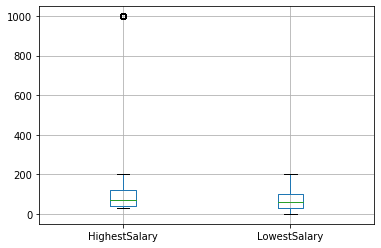

In [48]:
#Analysis range of salary
#salaryDataFrame = baseDataFrame.dropna(subset=['LowestSalary'])
#pd.to_numeric(salaryDataFrame['LowestSalary'])
#Show outliers
boxplot = baseDataFrame.boxplot(column=['HighestSalary', 'LowestSalary'])
#Remove outliers in wages
from scipy import stats
salaryDataFrame = baseDataFrame[(np.abs(stats.zscore(baseDataFrame['HighestSalary'])) < 3)]
salaryDataFrame = salaryDataFrame[(np.abs(stats.zscore(salaryDataFrame['LowestSalary'])) < 3)]

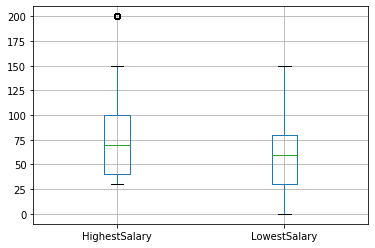

In [49]:
boxplot = salaryDataFrame.boxplot(column=['HighestSalary', 'LowestSalary'])

In [50]:
salaryDataFrame.groupby(['HighestSalary']).size()

HighestSalary
30     60455
40     22229
50     33127
60     26031
70     27399
80     27439
100    22697
120    25992
150    22947
200    24106
dtype: int64

In [51]:
salaryDataFrame.groupby(['LowestSalary']).size()

LowestSalary
0      60455
30     22229
40     33127
50     26031
60     27399
70     27439
80     22697
100    25992
120    22947
150    24106
dtype: int64